# temporal preserverance property

## plan
1. reuse the autoencoder for each epoch
2. the input should be the edge dataset, as well as the C and alpha (from data-preprocessing)
3. train the dataset with new temporal loss
4. print the result for each epoch and draw a demo picture for it
5. cooperate all pictures into a video


## reuse autoencoder for each epoch
1. load model
2. find border points
3. clustering and find border centers
4. train_data clustering and find centers

In [1]:
import torch
import math

import numpy as np
import torchvision
import torchvision.transforms as transforms
import time
import os 
import json

from cifar10_models import *

In [2]:
INPUT_SIZE = 2048
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [3]:
# load model
model = resnet50()
# load state dict
checkpoint = torch.load("E:\\xianglin\\git_space\\pyTorch_CIFAR10\\models\\resnet50\\epoch=185.ckpt", 
                        map_location=device)
state_dict = checkpoint['state_dict']
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k.replace("model.","") # remove `module.`
    new_state_dict[name] = v
# load params
model.load_state_dict(new_state_dict)

# model.load_state_dict(state_dict,strict=False)
model.eval()
model.to(device)
print("Load Model successfully...")

Load Model successfully...


## preprocessing models

In [3]:
import os
# load model
path = "E:\\xianglin\\git_space\\pyTorch_CIFAR10\\models\\resnet34"
for i in range(200):
    checkpoint = torch.load(os.path.join(path, "epoch={:03d}.ckpt".format(i)), 
                        map_location=device)
    state_dict = checkpoint['state_dict']
    from collections import OrderedDict
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        name = k.replace("model.","") # remove `module.`
        new_state_dict[name] = v
    torch.save(new_state_dict, os.path.join(path, "{:d}.pth".format(i+1)))

In [4]:
path = "E:\\DVI_exp_data\\resnet34\\Model"

for i in range(1, 201, 1):
    d = os.path.join(path, "Epoch_{:d}".format(i))
    if not os.path.exists(d):
        os.mkdir(d)
    oldname = os.path.join(path, "{:d}.pth".format(i))
    newname = os.path.join(d,"subject_model.pth")
    os.rename(oldname, newname)

In [8]:
path = "E:\\DVI_exp_data\\resnet50\\Model"
index = np.arange(50000)
index= index.tolist()
for i in range(1, 201, 1):
    d = os.path.join(path, "Epoch_{:d}".format(i))
    with open(os.path.join(d, "index.json"),"w") as f:
        json.dump(index, f)

## 

In [3]:
# load model
model = resnet18()

model_location ="E:\\DVI_exp_data\\resnet18\\Model\\Epoch_182\\subject_model.pth"
model.load_state_dict(torch.load(model_location))

model.eval()
model.to(device)
print("Load Model successfully...")

Load Model successfully...


In [4]:
# hyperparameters
data_shape = (512,)

# train
n_epochs = 500
batch_size = 200
learn_rate = 0.001

In [9]:
import os
save_loc = "E:\\DVI_exp_data\\resnet50\\Training_data"
if not os.path.exists(save_loc):
    os.mkdir(save_loc)
# CIFAR10 Test dataset and dataloader declaration
CIFAR_NORM = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(*CIFAR_NORM)])

trainset = torchvision.datasets.CIFAR10(root='data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=200,
                                          shuffle=False, num_workers=0)
training_data = np.zeros((50000, 3, 32, 32))
training_pred_labels = np.zeros(50000)

for i, (data, target) in enumerate(trainloader, 0):
    r1, r2 = i * 200, (i + 1) * 200
    training_data[r1:r2] = data
    train_pred_labels[r1:r2] = target
torch.save(torch.from_numpy(training_data),os.path.join(save_loc,"training_dataset_data.pth"))
torch.save(torch.from_numpy(training_pred_labels),os.path.join(save_loc,"training_dataset_label.pth"))

Files already downloaded and verified


In [10]:
save_loc = "E:\\DVI_exp_data\\resnet50\\Testing_data"
if not os.path.exists(save_loc):
    os.mkdir(save_loc)
# CIFAR10 Test dataset and dataloader declaration
CIFAR_NORM = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(*CIFAR_NORM)])
testset = torchvision.datasets.CIFAR10(root='data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=200,
                                          shuffle=False, num_workers=2)
testing_data = np.zeros((10000, 3, 32, 32))
testing_pred_labels = np.zeros(10000)
for i, (data, target) in enumerate(testloader, 0):
    r1, r2 = i * 200, (i + 1) * 200
    testing_data[r1:r2] = data
    testing_pred_labels[r1:r2] = target
torch.save(torch.from_numpy(testing_data),os.path.join(save_loc,"testing_dataset_data.pth"))
torch.save(torch.from_numpy(testing_pred_labels),os.path.join(save_loc,"testing_dataset_label.pth"))

Files already downloaded and verified


In [ ]:
# CIFAR10 Test dataset and dataloader declaration
CIFAR_NORM = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(*CIFAR_NORM)])

trainset = torchvision.datasets.CIFAR10(root='data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=200,
                                          shuffle=False, num_workers=0)
training_data = np.zeros((50000, 3, 32, 32))

for i, (data, target) in enumerate(trainloader, 0):
    r1, r2 = i * 200, (i + 1) * 200
    training_data[r1:r2] = data

train_pred_labels = np.zeros(50000)
raw_input_X = torch.from_numpy(training_data).to(device, dtype=torch.float)
input_X = np.zeros([len(raw_input_X), data_shape[0]])
output_Y = np.zeros(len(raw_input_X))
n_batches = max(math.ceil(len(raw_input_X) / batch_size), 1)
for b in range(n_batches):
    r1, r2 = b * batch_size, (b + 1) * batch_size
    inputs = raw_input_X[r1:r2]
    with torch.no_grad():
        pred = model.gap(inputs).cpu().numpy()
        input_X[r1:r2] = pred
        pred = model(inputs).cpu().numpy().argmax(axis=1)
        output_Y[r1:r2] = pred
train_data = input_X    # (50000,2048)
train_pred_labels = output_Y

training_data.shape, train_data.shape, train_pred_labels.shape

Files already downloaded and verified


In [ ]:
# CIFAR10 Test dataset and dataloader declaration
CIFAR_NORM = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(*CIFAR_NORM)])
testset = torchvision.datasets.CIFAR10(root='data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=200,
                                          shuffle=False, num_workers=2)
testing_data = np.zeros((10000, 3, 32, 32))
for i, (data, target) in enumerate(testloader, 0):
    r1, r2 = i * 200, (i + 1) * 200
    testing_data[r1:r2] = data

raw_input_X = torch.from_numpy(testing_data).to(device, dtype=torch.float)
input_X = np.zeros([len(raw_input_X), data_shape[0]])
output_Y = np.zeros(len(raw_input_X))
n_batches = max(math.ceil(len(raw_input_X) / batch_size), 1)
for b in range(n_batches):
    r1, r2 = b * batch_size, (b + 1) * batch_size
    inputs = raw_input_X[r1:r2]
    with torch.no_grad():
        pred = model.gap(inputs).cpu().numpy()
        input_X[r1:r2] = pred
        pred = model(inputs).cpu().numpy().argmax(axis=1)
        output_Y[r1:r2] = pred
test_data = input_X    # (10000,2048)
test_pred_labels = output_Y

testing_data.shape, test_data.shape, test_pred_labels.shape

In [5]:
train_data = np.load("E:\\DVI_exp_data\\resnet18\\Model\\Epoch_182\\train_data.npy")
train_data.shape

(50000, 512)

### adv attack to get border centers

In [6]:
border_centers = np.load("E:\\DVI_exp_data\\resnet18\\Model\\Epoch_182\\border_centers.npy")
border_centers.shape

(5000, 512)

### find train centers

In [7]:
centers = np.load("E:\\DVI_exp_data\\resnet18\\Model\\Epoch_182\\train_centers.npy")
centers.shape

(5000, 512)

### temporal

In [8]:
from parametric_umap_DBP import find_alpha

In [13]:
t0=time.time()
# alpha = find_alpha(prev_data, train_data,15)
alpha = find_alpha(prev_data, train_data, 15)
t1=time.time()
t1-t0

Mon Feb 15 13:45:23 2021 Building RP forest with 16 trees
Mon Feb 15 13:45:24 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Mon Feb 15 13:45:35 2021 Building RP forest with 16 trees
Mon Feb 15 13:45:36 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations


15.508164882659912

In [12]:
prev_data = np.load("E:\\DVI_exp_data\\resnet18\\Model\\Epoch_181\\train_data.npy")
prev_embedding = load_encoder(prev_data).cpu().numpy()
prev_embedding.shape

Instructions for updating:
Use tf.identity instead.


(50000, 2)

### build a new complex

In [8]:
# define encoderd
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [9]:
from parametric_umap_DBP import construct_temporal_mixed_edge_dataset
from parametric_umap_DBP import construct_mixed_edge_dataset
from parametric_umap_DBP import umap_loss
from parametric_umap_DBP import temporal_loss

In [10]:
dims = (512,)
n_components = 2
low_dims =(n_components,)

n_epochs = 200 

In [11]:
encoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=dims),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=n_components),
])
encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 514       
Total params: 329,218
Trainable params: 329,218
Non-trainable params: 0
__________________________________________________

In [12]:
# define the decoder
decoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(n_components)),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=np.product(dims), name="recon", activation=None),
    tf.keras.layers.Reshape(dims),

])
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               768       
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
recon (Dense)                (None, 512)               131584    
_________________________________________________________________
reshape (Reshape)            (None, 512)               0         
Total params: 329,728
Trainable params: 329,728
Non-trainable params: 0
________________________________________________

In [13]:
train_data.shape, centers.shape, border_centers.shape

((50000, 512), (5000, 512), (5000, 512))

In [14]:
## nndescent?
from sklearn.neighbors import KDTree
high_tree = KDTree(border_centers) 
from sklearn.utils import check_random_state
random_state = check_random_state(None)
fitting_data = np.concatenate((centers, border_centers),axis=0)

In [15]:
# fuzzy simplicial set
knn_dists, knn_indices = high_tree.query(fitting_data, k=15) 

In [16]:
knn_indices = knn_indices+len(centers)

In [17]:
# symmetric
from umap.umap_ import fuzzy_simplicial_set
# build fuzzy_simplicial_set
new_complex, sigmas, rhos = fuzzy_simplicial_set(
    X = fitting_data,
    n_neighbors = 15,
    metric = "euclidean",
    random_state = random_state,
    knn_indices= knn_indices,
    knn_dists = knn_dists,
)

In [18]:
# number of trees in random projection forest
n_trees = min(64, 5 + int(round((fitting_data.shape[0]) ** 0.5 / 20.0)))
# max number of nearest neighbor iters to perform
n_iters = max(5, int(round(np.log2(fitting_data.shape[0]))))
# distance metric
metric = "euclidean"
# number of neighbors for computing k-neighbor graph
n_neighbors = 15

from pynndescent import NNDescent
# get nearest neighbors
nnd = NNDescent(
    train_data,
    n_neighbors=n_neighbors,
    metric=metric,
    n_trees=n_trees,
    n_iters=n_iters,
    max_candidates=60,
    verbose=True
)

Mon Feb 15 17:21:37 2021 Building RP forest with 10 trees
Mon Feb 15 17:21:38 2021 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	Stopping threshold met -- exiting after 3 iterations


In [19]:
from sklearn.utils import check_random_state
from umap.umap_ import fuzzy_simplicial_set
knn_indices, knn_dists = nnd.neighbor_graph
random_state = check_random_state(None)
old_complex, sigmas, rhos = fuzzy_simplicial_set(
    X=train_data,
    n_neighbors=n_neighbors,
    metric=metric,
    random_state=random_state,
    knn_indices=knn_indices,
    knn_dists=knn_dists,
)

In [20]:
batch_size=200

In [25]:
(
    new_edge_dataset,
    batch_size,
    n_edges,
    edge_weight,
) = construct_temporal_mixed_edge_dataset(
    (train_data, centers, border_centers),
    old_complex,
    new_complex,
    n_epochs,
    batch_size,
    parametric_embedding = True,
    parametric_reconstruction = True,
    alpha=alpha,
    prev_embedding=prev_embedding
)

In [21]:
(
    new_edge_dataset,
    batch_size,
    n_edges,
    edge_weight,
) = construct_mixed_edge_dataset(
    (train_data, centers, border_centers),
    old_complex,
    new_complex,
    n_epochs,
    batch_size,
    parametric_embedding = True,
    parametric_reconstruction = True
)

In [22]:
import keras.backend as K
# define model
# network outputs
outputs = {}

# inputs
to_x = tf.keras.layers.Input(shape=dims, name="to_x")
from_x = tf.keras.layers.Input(shape=dims, name="from_x")
# to_alpha = tf.keras.layers.Input(shape=(1, ), name="to_alpha")
# to_px = tf.keras.layers.Input(shape=low_dims, name="to_px")
weight = tf.keras.layers.Input(shape=(1, ), name="weight")
# inputs = (to_x, from_x, to_alpha, to_px, weight)
inputs = (to_x, from_x, weight)

# parametric embedding
embedding_to = encoder(to_x)
embedding_from = encoder(from_x)

# parametric reconstruction
embedding_to_recon = decoder(embedding_to)

embedding_to_recon = tf.keras.layers.Lambda(
    lambda x: x, name="reconstruction"
)(embedding_to_recon)

outputs["reconstruction"] = embedding_to_recon

# concatenate to/from projections for loss computation
embedding_to_from = tf.concat((embedding_to, embedding_from, weight), axis=1)
embedding_to_from = tf.keras.layers.Lambda(lambda x: x, name="umap")(
    embedding_to_from
)

# weights = tf.keras.layers.Lambda(lambda x: x, name="weights")(
#     weight
# )

outputs["umap"] = embedding_to_from

# outputs["weights"] = weights

# embedding_diff = tf.concat((to_px, embedding_to, to_alpha), axis=1)
# embedding_diff = tf.keras.layers.Lambda(lambda x: x, name="temporal")(
#     embedding_diff
# )
# outputs["temporal"] = embedding_diff

# create model
parametric_model = tf.keras.Model(inputs=inputs, outputs=outputs,)

In [23]:
from umap.umap_ import find_ab_params
min_dist = 0.1
_a, _b = find_ab_params(1.0, min_dist)
negative_sample_rate = 5
optimizer = tf.keras.optimizers.Adam(1e-3)

In [24]:
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 5:
        lr *= 1e-1
    elif epoch > 15:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        min_delta=10**-2,
        patience=10,
        verbose=1,
    ),
#     tf.keras.callbacks.TensorBoard(log_dir='logs/mse/',histogram_freq=1),
    tf.keras.callbacks.LearningRateScheduler(lr_schedule),
#     tf.keras.callbacks.ReduceLROnPlateau(factor=np.sqrt(0.1),
#                                cooldown=0,
#                                patience=5,
#                                min_lr=0.5e-6)
]

In [25]:
#compile models
losses = {}
loss_weights = {}

umap_loss_fn = umap_loss(
    batch_size,
    negative_sample_rate,
    _a,
    _b,
    edge_weight,
    True,
)

losses["umap"] = umap_loss_fn
loss_weights["umap"] = 1.0

losses["reconstruction"] = tf.keras.losses.MeanSquaredError()
loss_weights["reconstruction"] = 1.0

# temporal_loss_fn = temporal_loss()
# losses["temporal"] = temporal_loss_fn
# loss_weights["temporal"] = 1.0

parametric_model.compile(
    optimizer=optimizer, loss=losses, loss_weights=loss_weights,
)

In [26]:
steps_per_epoch = int(
    n_edges / batch_size / 10
)
# val_steps_per_epoch = int(
#     val_n_edges / batch_size / 5
# )

In [27]:
# create embedding
history = parametric_model.fit(
    new_edge_dataset,
    epochs=30,
    steps_per_epoch=steps_per_epoch,
    callbacks=callbacks,
    max_queue_size=100,
)

Epoch 1/30
Learning rate:  0.001
4082/4082 [==============================] - 40s 9ms/step - loss: 0.1454 - reconstruction_loss: 0.0045 - umap_loss: 0.1409
Epoch 2/30
Learning rate:  0.001
4082/4082 [==============================] - 39s 10ms/step - loss: 0.1122 - reconstruction_loss: 0.0022 - umap_loss: 0.1100
Epoch 3/30
Learning rate:  0.001
4082/4082 [==============================] - 39s 10ms/step - loss: 0.1082 - reconstruction_loss: 0.0017 - umap_loss: 0.1065
Epoch 4/30
Learning rate:  0.001
4082/4082 [==============================] - 39s 9ms/step - loss: 0.1061 - reconstruction_loss: 0.0016 - umap_loss: 0.1046
Epoch 5/30
Learning rate:  0.001
4082/4082 [==============================] - 39s 9ms/step - loss: 0.1041 - reconstruction_loss: 0.0015 - umap_loss: 0.1026
Epoch 6/30
Learning rate:  0.001
4082/4082 [==============================] - 39s 10ms/step - loss: 0.1030 - reconstruction_loss: 0.0014 - umap_loss: 0.1016
Epoch 7/30
Learning rate:  0.0001
4082/4082 [================

KeyboardInterrupt: 

### save and load model

In [32]:
# save
import os

save_location = "E:\\DVI_exp_data\\resnet18\\Model\\Epoch_182"
if not os.path.exists(save_location):
    os.mkdir(save_location)
# # save encoder
encoder_output = os.path.join(save_location, "encoder")
encoder.save(encoder_output)
print("Keras encoder model saved to {}".format(encoder_output))

# # save decoder
decoder_output = os.path.join(save_location, "decoder")
decoder.save(decoder_output)
print("Keras decoder model saved to {}".format(decoder_output))


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: E:\DVI_exp_data\resnet18\Model\Epoch_182\encoder\assets
Keras encoder model saved to E:\DVI_exp_data\resnet18\Model\Epoch_182\encoder

FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: E:\DVI_exp_data\resnet18\Model\Epoch_182\decoder\assets
Keras decoder model saved to E:\DVI_exp_data\resnet18\Model\Epoch_182\decoder


In [11]:
import os
save_location = "E:\\DVI_exp_data\\resnet18\\Model\\Epoch_181"
# load model
# load encoder
encoder_output = os.path.join(save_location, "encoder")
if os.path.exists(encoder_output):
    load_encoder = tf.keras.models.load_model(encoder_output)
    print("Keras encoder model loaded from {}".format(encoder_output))

# load decoder
decoder_output = os.path.join(save_location, "decoder")
if os.path.exists(decoder_output):
    load_decoder = tf.keras.models.load_model(decoder_output)
    print("Keras decoder model loaded from {}".format(decoder_output))

Keras encoder model loaded from E:\DVI_exp_data\resnet18\Model\Epoch_181\encoder
Keras decoder model loaded from E:\DVI_exp_data\resnet18\Model\Epoch_181\decoder


### save training data and embedding for evaluation

In [48]:
save_dir = "temporal_exp_data"
np.save(os.path.join(save_dir, "train_{:03d}.npy".format(185)), train_data)
np.save(os.path.join(save_dir, "test_{:03d}.npy".format(185)), test_data)
# np.save(os.path.join(save_dir, "train_emb_{:03d}.npy".format(185)), train_emb_data)
# np.save(os.path.join(save_dir, "test_emb_{:03d}.npy".format(185)), test_emb_data)

In [8]:
train_data = np.load("temporal_exp_data\\train_185.npy")
test_data = np.load("temporal_exp_data\\test_185.npy")

### evaluate

In [36]:
train_emb = encoder(train_data[:1000]).cpu().numpy()
test_emb = encoder(train_data[:1000]).cpu().numpy()

Instructions for updating:
Use tf.identity instead.


Text(0.5, 1.0, 'parametric UMAP autoencoder embeddings-training data')

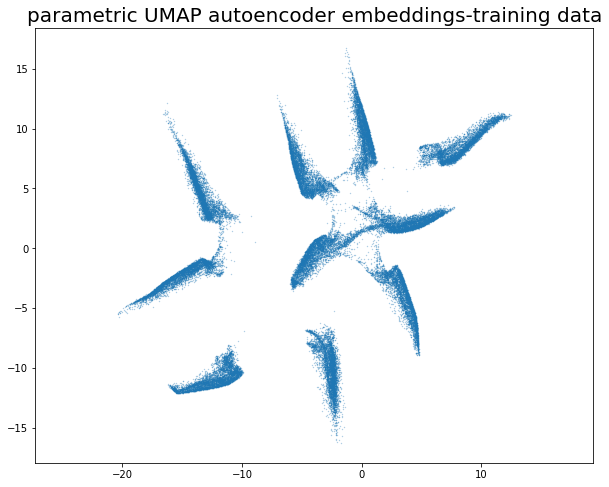

In [31]:
import matplotlib.pyplot as plt
# vis_data=np.concatenate((test_data,border_center),axis=0)
# vis_labels = np.concatenate((test_pred_labels, border_center_labels),axis=0)
# Project (train_data+augmentation_data)
# z = embedder.transform(train_emb)
# z = embedder.transform(border_center)
z = encoder(train_data)
# z = train_data

fig, ax = plt.subplots(ncols=1, figsize=(10, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
#     c=vis_labels,
#     cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("parametric UMAP autoencoder embeddings-training data", fontsize=20)

Text(0.5, 1.0, 'parametric UMAP autoencoder embeddings-training data')

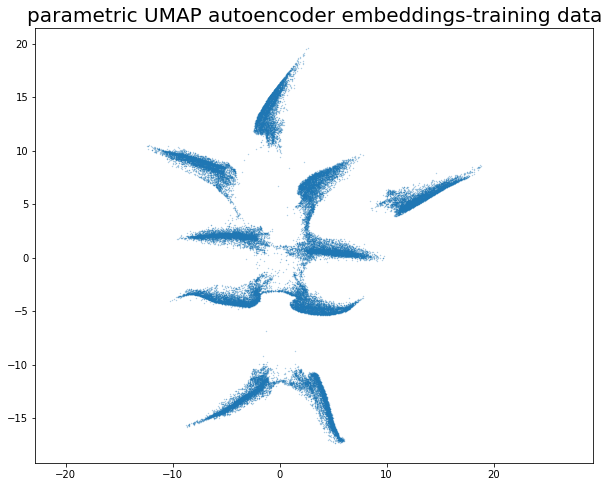

In [29]:
import matplotlib.pyplot as plt
# vis_data=np.concatenate((test_data,border_center),axis=0)
# vis_labels = np.concatenate((test_pred_labels, border_center_labels),axis=0)
# Project (train_data+augmentation_data)
# z = embedder.transform(train_emb)
# z = embedder.transform(border_center)
z = encoder(train_data)
# z = train_data

fig, ax = plt.subplots(ncols=1, figsize=(10, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
#     c=vis_labels,
#     cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("parametric UMAP autoencoder embeddings-training data", fontsize=20)

Text(0.5, 1.0, 'parametric UMAP autoencoder embeddings-training data')

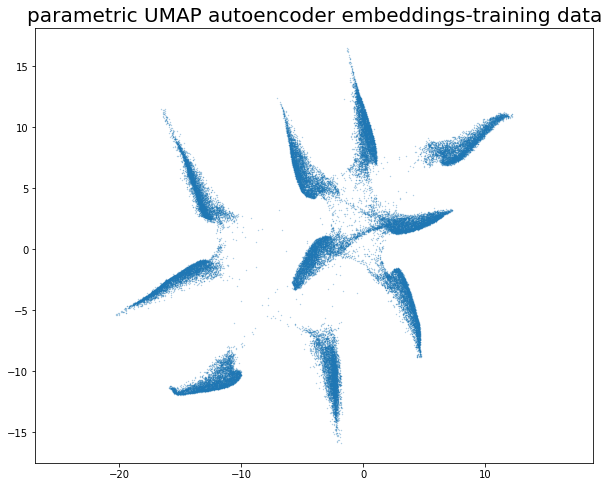

In [33]:
import matplotlib.pyplot as plt
# vis_data=np.concatenate((test_data,border_center),axis=0)
# vis_labels = np.concatenate((test_pred_labels, border_center_labels),axis=0)
# Project (train_data+augmentation_data)
# z = embedder.transform(train_emb)
# z = embedder.transform(border_center)
z = encoder(train_data)
# z = train_data

fig, ax = plt.subplots(ncols=1, figsize=(10, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
#     c=vis_labels,
#     cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("parametric UMAP autoencoder embeddings-training data", fontsize=20)

In [ ]:
import matplotlib.pyplot as plt
# vis_data=np.concatenate((test_data,border_center),axis=0)
# vis_labels = np.concatenate((test_pred_labels, border_center_labels),axis=0)
# Project (train_data+augmentation_data)
# z = embedder.transform(train_emb)
# z = embedder.transform(border_center)
z = encoder(train_data)
# z = train_data

fig, ax = plt.subplots(ncols=1, figsize=(10, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
#     c=vis_labels,
#     cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("parametric UMAP autoencoder embeddings-training data", fontsize=20)

## print the result for each snapshot and draw a demo for it

ParametricUMAP(autoencoder_loss=True,
               decoder=<tensorflow.python.keras.engine.sequential.Sequential object at 0x00000247DFF52518>,
               dims=(64,),
               encoder=<tensorflow.python.keras.engine.sequential.Sequential object at 0x00000247DFF81CF8>,
               keras_fit_kwargs={'callbacks': [<tensorflow.python.keras.callbacks.EarlyStopping object at 0x00000247E0FAE390>,
                                               <tensorflow.python.keras.callbacks.TensorBoard object at 0x00000247E0FAEDA0>]},
               n_training_epochs=100,
               optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x00000247DFFBBB38>,
               parametric_reconstruction=True)
Construct fuzzy simplicial set
Thu Dec 17 00:29:37 2020 Finding Nearest Neighbors
Thu Dec 17 00:29:37 2020 Building RP forest with 16 trees
Thu Dec 17 00:29:38 2020 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting aft

D:\xianglin\git_space\DeepVisualInsight\DeepView\parametric_umap.py:268: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Epoch 1/1000
612/612 [==============================] - 6s 9ms/step - loss: 2.3267 - reconstruction_loss: 2.0260 - umap_loss: 0.3007
Epoch 2/1000
612/612 [==============================] - 4s 7ms/step - loss: 0.7633 - reconstruction_loss: 0.5487 - umap_loss: 0.2146
Epoch 3/1000
612/612 [==============================] - 5s 8ms/step - loss: 0.6802 - reconstruction_loss: 0.4785 - umap_loss: 0.2017
Epoch 4/1000
612/612 [==============================] - 5s 8ms/step - loss: 0.6139 - reconstruction_loss: 0.4196 - umap_loss: 0.1943
Epoch 5/1000
612/612 [==============================] - 5s 7ms/step - loss: 0.5867 - reconstruction_loss: 0.3973 - umap_loss: 0.1894
Epoch 6/1000
612/612 [==============================] - 5s 8ms/step - loss: 0.5683 - reconstruction_loss: 0.3810 - umap_loss: 0.1873
Epoch 7/1000
612/612 [==============================] - 5s 7ms/step - loss: 0.5533 - reconstruction_loss: 0.3680 - umap_loss: 0.1853
Epoch 8/1000
612/612 [==============================] - 5s 7ms/step -

	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Thu Dec 17 00:33:09 2020 Finished Nearest Neighbor Search
Thu Dec 17 00:33:10 2020 Construct embedding


D:\xianglin\git_space\DeepVisualInsight\DeepView\parametric_umap.py:268: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Epoch 1/1000
620/620 [==============================] - 7s 10ms/step - loss: 0.4961 - reconstruction_loss: 0.3165 - umap_loss: 0.1796
Epoch 2/1000
620/620 [==============================] - 6s 9ms/step - loss: 0.4527 - reconstruction_loss: 0.2786 - umap_loss: 0.1740
Epoch 3/1000
620/620 [==============================] - 5s 9ms/step - loss: 0.4494 - reconstruction_loss: 0.2760 - umap_loss: 0.1734
Epoch 4/1000
620/620 [==============================] - 6s 9ms/step - loss: 0.4469 - reconstruction_loss: 0.2744 - umap_loss: 0.1725
Epoch 5/1000
620/620 [==============================] - 6s 9ms/step - loss: 0.4451 - reconstruction_loss: 0.2728 - umap_loss: 0.1723
Epoch 6/1000
620/620 [==============================] - 6s 9ms/step - loss: 0.4434 - reconstruction_loss: 0.2718 - umap_loss: 0.1716
Epoch 7/1000
620/620 [==============================] - 6s 9ms/step - loss: 0.4427 - reconstruction_loss: 0.2712 - umap_loss: 0.1716A: 1s - loss: 0.4429 - reconstructio
Epoch 8/1000
620/620 [==========

D:\xianglin\git_space\DeepVisualInsight\DeepView\parametric_umap.py:268: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Epoch 1/1000
626/626 [==============================] - 6s 9ms/step - loss: 0.4206 - reconstruction_loss: 0.2403 - umap_loss: 0.1803
Epoch 2/1000
626/626 [==============================] - 5s 8ms/step - loss: 0.3874 - reconstruction_loss: 0.2127 - umap_loss: 0.1747
Epoch 3/1000
626/626 [==============================] - 5s 8ms/step - loss: 0.3838 - reconstruction_loss: 0.2104 - umap_loss: 0.1734
Epoch 4/1000
626/626 [==============================] - 5s 8ms/step - loss: 0.3812 - reconstruction_loss: 0.2090 - umap_loss: 0.1722
Epoch 5/1000
626/626 [==============================] - 5s 8ms/step - loss: 0.3800 - reconstruction_loss: 0.2081 - umap_loss: 0.1720
Epoch 6/1000
626/626 [==============================] - 5s 8ms/step - loss: 0.3787 - reconstruction_loss: 0.2073 - umap_loss: 0.1714
Epoch 7/1000
626/626 [==============================] - 5s 8ms/step - loss: 0.3779 - reconstruction_loss: 0.2068 - umap_loss: 0.1711
Epoch 8/1000
626/626 [==============================] - 5s 8ms/step -

D:\xianglin\git_space\DeepVisualInsight\DeepView\parametric_umap.py:268: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Epoch 1/1000
633/633 [==============================] - 7s 10ms/step - loss: 0.3922 - reconstruction_loss: 0.2085 - umap_loss: 0.1837
Epoch 2/1000
633/633 [==============================] - 6s 9ms/step - loss: 0.3696 - reconstruction_loss: 0.1927 - umap_loss: 0.1769
Epoch 3/1000
633/633 [==============================] - 6s 9ms/step - loss: 0.3674 - reconstruction_loss: 0.1911 - umap_loss: 0.1763
Epoch 4/1000
633/633 [==============================] - 6s 9ms/step - loss: 0.3654 - reconstruction_loss: 0.1901 - umap_loss: 0.1753A: 1s - loss: 0.3655 - reconstruction_loss: 0.1902
Epoch 5/1000
633/633 [==============================] - 6s 10ms/step - loss: 0.3634 - reconstruction_loss: 0.1887 - umap_loss: 0.1747
Epoch 6/1000
633/633 [==============================] - 6s 9ms/step - loss: 0.3629 - reconstruction_loss: 0.1888 - umap_loss: 0.1741
Epoch 7/1000
633/633 [==============================] - 6s 9ms/step - loss: 0.3619 - reconstruction_loss: 0.1882 - umap_loss: 0.1736
Epoch 8/1000
633/

D:\xianglin\git_space\DeepVisualInsight\DeepView\parametric_umap.py:268: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Epoch 1/1000
635/635 [==============================] - 7s 10ms/step - loss: 0.3472 - reconstruction_loss: 0.1714 - umap_loss: 0.1758
Epoch 2/1000
635/635 [==============================] - 6s 9ms/step - loss: 0.3268 - reconstruction_loss: 0.1568 - umap_loss: 0.1700
Epoch 3/1000
635/635 [==============================] - 6s 10ms/step - loss: 0.3249 - reconstruction_loss: 0.1552 - umap_loss: 0.1697
Epoch 4/1000
635/635 [==============================] - 6s 9ms/step - loss: 0.3231 - reconstruction_loss: 0.1542 - umap_loss: 0.1689
Epoch 5/1000
635/635 [==============================] - 6s 9ms/step - loss: 0.3219 - reconstruction_loss: 0.1538 - umap_loss: 0.1681
Epoch 6/1000
635/635 [==============================] - 6s 9ms/step - loss: 0.3216 - reconstruction_loss: 0.1536 - umap_loss: 0.1681
Epoch 7/1000
635/635 [==============================] - 5s 8ms/step - loss: 0.3208 - reconstruction_loss: 0.1533 - umap_loss: 0.1675
Epoch 8/1000
635/635 [==============================] - 6s 9ms/step

D:\xianglin\git_space\DeepVisualInsight\DeepView\parametric_umap.py:268: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Epoch 1/1000
633/633 [==============================] - 6s 9ms/step - loss: 0.3321 - reconstruction_loss: 0.1635 - umap_loss: 0.1686
Epoch 2/1000
633/633 [==============================] - 5s 8ms/step - loss: 0.3181 - reconstruction_loss: 0.1539 - umap_loss: 0.1642
Epoch 3/1000
633/633 [==============================] - 5s 8ms/step - loss: 0.3160 - reconstruction_loss: 0.1526 - umap_loss: 0.1635
Epoch 4/1000
633/633 [==============================] - 5s 7ms/step - loss: 0.3151 - reconstruction_loss: 0.1521 - umap_loss: 0.1630
Epoch 5/1000
633/633 [==============================] - 5s 8ms/step - loss: 0.3134 - reconstruction_loss: 0.1513 - umap_loss: 0.1621
Epoch 6/1000
633/633 [==============================] - 5s 8ms/step - loss: 0.3124 - reconstruction_loss: 0.1508 - umap_loss: 0.1616
Epoch 7/1000
633/633 [==============================] - 5s 7ms/step - loss: 0.3129 - reconstruction_loss: 0.1507 - umap_loss: 0.1622
Epoch 8/1000
633/633 [==============================] - 5s 8ms/step -

D:\xianglin\git_space\DeepVisualInsight\DeepView\parametric_umap.py:268: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Epoch 1/1000
646/646 [==============================] - 7s 10ms/step - loss: 0.3018 - reconstruction_loss: 0.1294 - umap_loss: 0.1724
Epoch 2/1000
646/646 [==============================] - 6s 9ms/step - loss: 0.2912 - reconstruction_loss: 0.1218 - umap_loss: 0.1694
Epoch 3/1000
646/646 [==============================] - 6s 9ms/step - loss: 0.2884 - reconstruction_loss: 0.1205 - umap_loss: 0.1679A:
Epoch 4/1000
646/646 [==============================] - 6s 9ms/step - loss: 0.2865 - reconstruction_loss: 0.1197 - umap_loss: 0.1668
Epoch 5/1000
646/646 [==============================] - 6s 9ms/step - loss: 0.2858 - reconstruction_loss: 0.1194 - umap_loss: 0.1664
Epoch 6/1000
646/646 [==============================] - 6s 9ms/step - loss: 0.2856 - reconstruction_loss: 0.1192 - umap_loss: 0.1664
Epoch 7/1000
646/646 [==============================] - 6s 9ms/step - loss: 0.2850 - reconstruction_loss: 0.1190 - umap_loss: 0.1660
Epoch 8/1000
646/646 [==============================] - 6s 9ms/ste

D:\xianglin\git_space\DeepVisualInsight\DeepView\parametric_umap.py:268: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Epoch 1/1000
637/637 [==============================] - 6s 9ms/step - loss: 0.3013 - reconstruction_loss: 0.1241 - umap_loss: 0.1771
Epoch 2/1000
637/637 [==============================] - 5s 8ms/step - loss: 0.2916 - reconstruction_loss: 0.1182 - umap_loss: 0.1733
Epoch 3/1000
637/637 [==============================] - 5s 7ms/step - loss: 0.2897 - reconstruction_loss: 0.1174 - umap_loss: 0.1723
Epoch 4/1000
637/637 [==============================] - 5s 8ms/step - loss: 0.2894 - reconstruction_loss: 0.1170 - umap_loss: 0.1723A: 2s - loss: 0.2897 - r
Epoch 5/1000
637/637 [==============================] - 5s 8ms/step - loss: 0.2892 - reconstruction_loss: 0.1168 - umap_loss: 0.1723
Epoch 6/1000
637/637 [==============================] - 5s 8ms/step - loss: 0.2882 - reconstruction_loss: 0.1166 - umap_loss: 0.1716
Epoch 7/1000
637/637 [==============================] - 5s 8ms/step - loss: 0.2879 - reconstruction_loss: 0.1161 - umap_loss: 0.1718
Epoch 8/1000
637/637 [=======================

D:\xianglin\git_space\DeepVisualInsight\DeepView\parametric_umap.py:268: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Epoch 1/1000
644/644 [==============================] - 7s 10ms/step - loss: 0.3084 - reconstruction_loss: 0.1537 - umap_loss: 0.1547
Epoch 2/1000
644/644 [==============================] - 6s 9ms/step - loss: 0.3001 - reconstruction_loss: 0.1481 - umap_loss: 0.1520A: 2s - loss: 0.3004
Epoch 3/1000
644/644 [==============================] - 6s 9ms/step - loss: 0.2985 - reconstruction_loss: 0.1473 - umap_loss: 0.1513
Epoch 4/1000
644/644 [==============================] - 6s 9ms/step - loss: 0.2980 - reconstruction_loss: 0.1470 - umap_loss: 0.1510
Epoch 5/1000
644/644 [==============================] - 6s 9ms/step - loss: 0.2960 - reconstruction_loss: 0.1461 - umap_loss: 0.1499
Epoch 6/1000
644/644 [==============================] - 6s 9ms/step - loss: 0.2965 - reconstruction_loss: 0.1462 - umap_loss: 0.1503
Epoch 7/1000
644/644 [==============================] - 6s 9ms/step - loss: 0.2957 - reconstruction_loss: 0.1458 - umap_loss: 0.1499
Epoch 8/1000
644/644 [==========================

D:\xianglin\git_space\DeepVisualInsight\DeepView\parametric_umap.py:268: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Epoch 1/1000
650/650 [==============================] - 7s 10ms/step - loss: 0.3154 - reconstruction_loss: 0.1656 - umap_loss: 0.1497
Epoch 2/1000
650/650 [==============================] - 6s 9ms/step - loss: 0.3120 - reconstruction_loss: 0.1642 - umap_loss: 0.1478
Epoch 3/1000
650/650 [==============================] - 6s 9ms/step - loss: 0.3120 - reconstruction_loss: 0.1638 - umap_loss: 0.1483
Epoch 4/1000
650/650 [==============================] - 6s 9ms/step - loss: 0.3116 - reconstruction_loss: 0.1636 - umap_loss: 0.1480
Epoch 5/1000
650/650 [==============================] - 6s 9ms/step - loss: 0.3109 - reconstruction_loss: 0.1634 - umap_loss: 0.1475
Epoch 6/1000
650/650 [==============================] - 6s 9ms/step - loss: 0.3105 - reconstruction_loss: 0.1630 - umap_loss: 0.1475A - ETA: 0s - loss: 0.3106 - reconstruction_loss: 0.1630 - umap_loss
Epoch 7/1000
650/650 [==============================] - 6s 9ms/step - loss: 0.3106 - reconstruction_loss: 0.1631 - umap_loss: 0.1474


D:\xianglin\git_space\DeepVisualInsight\DeepView\parametric_umap.py:268: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Epoch 1/1000
650/650 [==============================] - 6s 9ms/step - loss: 0.3267 - reconstruction_loss: 0.1778 - umap_loss: 0.1489
Epoch 2/1000
650/650 [==============================] - 5s 8ms/step - loss: 0.3231 - reconstruction_loss: 0.1758 - umap_loss: 0.1473
Epoch 3/1000
650/650 [==============================] - 5s 7ms/step - loss: 0.3218 - reconstruction_loss: 0.1751 - umap_loss: 0.1467
Epoch 4/1000
650/650 [==============================] - 5s 8ms/step - loss: 0.3216 - reconstruction_loss: 0.1752 - umap_loss: 0.1465
Epoch 5/1000
650/650 [==============================] - 5s 7ms/step - loss: 0.3211 - reconstruction_loss: 0.1747 - umap_loss: 0.1464
Epoch 6/1000
650/650 [==============================] - 5s 8ms/step - loss: 0.3209 - reconstruction_loss: 0.1747 - umap_loss: 0.1462
Epoch 7/1000
650/650 [==============================] - 5s 8ms/step - loss: 0.3208 - reconstruction_loss: 0.1745 - umap_loss: 0.1463
Epoch 8/1000
650/650 [==============================] - 5s 8ms/step -

D:\xianglin\git_space\DeepVisualInsight\DeepView\parametric_umap.py:268: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Epoch 1/1000
647/647 [==============================] - 7s 10ms/step - loss: 0.3334 - reconstruction_loss: 0.1863 - umap_loss: 0.1471
Epoch 2/1000
647/647 [==============================] - 6s 9ms/step - loss: 0.3307 - reconstruction_loss: 0.1845 - umap_loss: 0.1462A: 2s - loss: 0.331
Epoch 3/1000
647/647 [==============================] - 6s 9ms/step - loss: 0.3297 - reconstruction_loss: 0.1840 - umap_loss: 0.1457
Epoch 4/1000
647/647 [==============================] - 6s 9ms/step - loss: 0.3292 - reconstruction_loss: 0.1835 - umap_loss: 0.1457
Epoch 5/1000
647/647 [==============================] - 6s 9ms/step - loss: 0.3290 - reconstruction_loss: 0.1837 - umap_loss: 0.1453
Epoch 6/1000
647/647 [==============================] - 6s 9ms/step - loss: 0.3284 - reconstruction_loss: 0.1831 - umap_loss: 0.1453
Epoch 7/1000
647/647 [==============================] - 6s 9ms/step - loss: 0.3285 - reconstruction_loss: 0.1833 - umap_loss: 0.1452
Epoch 8/1000
647/647 [===========================

D:\xianglin\git_space\DeepVisualInsight\DeepView\parametric_umap.py:268: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Epoch 1/1000
651/651 [==============================] - 6s 9ms/step - loss: 0.3238 - reconstruction_loss: 0.1813 - umap_loss: 0.1425
Epoch 2/1000
651/651 [==============================] - 5s 8ms/step - loss: 0.3215 - reconstruction_loss: 0.1801 - umap_loss: 0.1415
Epoch 3/1000
651/651 [==============================] - 5s 8ms/step - loss: 0.3216 - reconstruction_loss: 0.1800 - umap_loss: 0.1416
Epoch 4/1000
651/651 [==============================] - 5s 8ms/step - loss: 0.3216 - reconstruction_loss: 0.1801 - umap_loss: 0.1415
Epoch 5/1000
651/651 [==============================] - 5s 8ms/step - loss: 0.3212 - reconstruction_loss: 0.1801 - umap_loss: 0.1410
Epoch 6/1000
651/651 [==============================] - 5s 7ms/step - loss: 0.3212 - reconstruction_loss: 0.1797 - umap_loss: 0.1415
Epoch 7/1000
651/651 [==============================] - 5s 8ms/step - loss: 0.3202 - reconstruction_loss: 0.1794 - umap_loss: 0.1408
Epoch 8/1000
651/651 [==============================] - 5s 8ms/step -

D:\xianglin\git_space\DeepVisualInsight\DeepView\parametric_umap.py:268: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Epoch 1/1000
652/652 [==============================] - 6s 8ms/step - loss: 0.3233 - reconstruction_loss: 0.1831 - umap_loss: 0.1402
Epoch 2/1000
652/652 [==============================] - 5s 8ms/step - loss: 0.3227 - reconstruction_loss: 0.1828 - umap_loss: 0.1399
Epoch 3/1000
652/652 [==============================] - 5s 7ms/step - loss: 0.3222 - reconstruction_loss: 0.1825 - umap_loss: 0.1397
Epoch 4/1000
652/652 [==============================] - 5s 8ms/step - loss: 0.3221 - reconstruction_loss: 0.1825 - umap_loss: 0.1396
Epoch 5/1000
652/652 [==============================] - 5s 8ms/step - loss: 0.3221 - reconstruction_loss: 0.1826 - umap_loss: 0.1396
Epoch 6/1000
652/652 [==============================] - 5s 8ms/step - loss: 0.3220 - reconstruction_loss: 0.1824 - umap_loss: 0.1396
Epoch 7/1000
652/652 [==============================] - 5s 8ms/step - loss: 0.3217 - reconstruction_loss: 0.1826 - umap_loss: 0.1392
Epoch 8/1000
652/652 [==============================] - 5s 7ms/step -

D:\xianglin\git_space\DeepVisualInsight\DeepView\parametric_umap.py:268: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Epoch 1/1000
653/653 [==============================] - 7s 10ms/step - loss: 0.3250 - reconstruction_loss: 0.1864 - umap_loss: 0.1386
Epoch 2/1000
653/653 [==============================] - 6s 9ms/step - loss: 0.3255 - reconstruction_loss: 0.1866 - umap_loss: 0.1389
Epoch 3/1000
653/653 [==============================] - 6s 9ms/step - loss: 0.3247 - reconstruction_loss: 0.1863 - umap_loss: 0.1384
Epoch 4/1000
653/653 [==============================] - 6s 9ms/step - loss: 0.3249 - reconstruction_loss: 0.1864 - umap_loss: 0.1386
Epoch 5/1000
653/653 [==============================] - 6s 9ms/step - loss: 0.3242 - reconstruction_loss: 0.1863 - umap_loss: 0.1379
Epoch 6/1000
653/653 [==============================] - 6s 9ms/step - loss: 0.3241 - reconstruction_loss: 0.1861 - umap_loss: 0.1380
Epoch 7/1000
653/653 [==============================] - 6s 9ms/step - loss: 0.3245 - reconstruction_loss: 0.1863 - umap_loss: 0.1382
Epoch 8/1000
653/653 [==============================] - 6s 9ms/step 

D:\xianglin\git_space\DeepVisualInsight\DeepView\parametric_umap.py:268: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Epoch 1/1000
652/652 [==============================] - 6s 8ms/step - loss: 0.3276 - reconstruction_loss: 0.1890 - umap_loss: 0.1387
Epoch 2/1000
652/652 [==============================] - 5s 8ms/step - loss: 0.3268 - reconstruction_loss: 0.1888 - umap_loss: 0.1380
Epoch 3/1000
652/652 [==============================] - 5s 8ms/step - loss: 0.3266 - reconstruction_loss: 0.1886 - umap_loss: 0.1380
Epoch 4/1000
652/652 [==============================] - 5s 8ms/step - loss: 0.3271 - reconstruction_loss: 0.1887 - umap_loss: 0.1384
Epoch 5/1000
652/652 [==============================] - 5s 8ms/step - loss: 0.3263 - reconstruction_loss: 0.1886 - umap_loss: 0.1377
Epoch 6/1000
652/652 [==============================] - 5s 8ms/step - loss: 0.3262 - reconstruction_loss: 0.1885 - umap_loss: 0.1377
Epoch 7/1000
652/652 [==============================] - 5s 8ms/step - loss: 0.3262 - reconstruction_loss: 0.1886 - umap_loss: 0.1375
Epoch 8/1000
652/652 [==============================] - 5s 8ms/step -

D:\xianglin\git_space\DeepVisualInsight\DeepView\parametric_umap.py:268: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Epoch 1/1000
651/651 [==============================] - 7s 10ms/step - loss: 0.3249 - reconstruction_loss: 0.1877 - umap_loss: 0.1372: 4s
Epoch 2/1000
651/651 [==============================] - 6s 9ms/step - loss: 0.3251 - reconstruction_loss: 0.1873 - umap_loss: 0.1377
Epoch 3/1000
651/651 [==============================] - 6s 9ms/step - loss: 0.3254 - reconstruction_loss: 0.1877 - umap_loss: 0.1377
Epoch 4/1000
651/651 [==============================] - 6s 9ms/step - loss: 0.3247 - reconstruction_loss: 0.1873 - umap_loss: 0.1374
Epoch 5/1000
651/651 [==============================] - 6s 9ms/step - loss: 0.3246 - reconstruction_loss: 0.1874 - umap_loss: 0.1372
Epoch 6/1000
651/651 [==============================] - 6s 9ms/step - loss: 0.3245 - reconstruction_loss: 0.1873 - umap_loss: 0.1372
Epoch 7/1000
651/651 [==============================] - 6s 9ms/step - loss: 0.3249 - reconstruction_loss: 0.1875 - umap_loss: 0.1375
Epoch 8/1000
651/651 [==============================] - 6s 9ms/s

D:\xianglin\git_space\DeepVisualInsight\DeepView\parametric_umap.py:268: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Epoch 1/1000
653/653 [==============================] - 7s 10ms/step - loss: 0.3245 - reconstruction_loss: 0.1872 - umap_loss: 0.1373
Epoch 2/1000
653/653 [==============================] - 6s 9ms/step - loss: 0.3240 - reconstruction_loss: 0.1872 - umap_loss: 0.1369
Epoch 3/1000
653/653 [==============================] - 6s 9ms/step - loss: 0.3242 - reconstruction_loss: 0.1873 - umap_loss: 0.1369
Epoch 4/1000
653/653 [==============================] - 6s 9ms/step - loss: 0.3248 - reconstruction_loss: 0.1872 - umap_loss: 0.1375
Epoch 5/1000
653/653 [==============================] - 6s 9ms/step - loss: 0.3240 - reconstruction_loss: 0.1869 - umap_loss: 0.1371
Epoch 6/1000
653/653 [==============================] - 6s 9ms/step - loss: 0.3241 - reconstruction_loss: 0.1870 - umap_loss: 0.1371
Epoch 7/1000
653/653 [==============================] - 6s 9ms/step - loss: 0.3237 - reconstruction_loss: 0.1869 - umap_loss: 0.1368
Epoch 8/1000
653/653 [==============================] - 6s 9ms/step 

D:\xianglin\git_space\DeepVisualInsight\DeepView\parametric_umap.py:268: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Epoch 1/1000
653/653 [==============================] - 6s 8ms/step - loss: 0.3231 - reconstruction_loss: 0.1866 - umap_loss: 0.1365
Epoch 2/1000
653/653 [==============================] - 5s 7ms/step - loss: 0.3224 - reconstruction_loss: 0.1864 - umap_loss: 0.1360
Epoch 3/1000
653/653 [==============================] - 5s 7ms/step - loss: 0.3233 - reconstruction_loss: 0.1866 - umap_loss: 0.1367
Epoch 4/1000
653/653 [==============================] - 5s 8ms/step - loss: 0.3231 - reconstruction_loss: 0.1868 - umap_loss: 0.1362
Epoch 5/1000
653/653 [==============================] - 5s 7ms/step - loss: 0.3234 - reconstruction_loss: 0.1867 - umap_loss: 0.1367
Epoch 6/1000
653/653 [==============================] - 5s 8ms/step - loss: 0.3242 - reconstruction_loss: 0.1872 - umap_loss: 0.1370A: 0s - loss: 0.3242 - reconstruction_loss: 0.1872 - umap_loss: 0.137
Epoch 7/1000
653/653 [==============================] - 5s 8ms/step - loss: 0.3227 - reconstruction_loss: 0.1865 - umap_loss: 0.1362


D:\xianglin\git_space\DeepVisualInsight\DeepView\parametric_umap.py:268: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Epoch 1/1000
653/653 [==============================] - 6s 9ms/step - loss: 0.3254 - reconstruction_loss: 0.1884 - umap_loss: 0.1370
Epoch 2/1000
653/653 [==============================] - 6s 9ms/step - loss: 0.3247 - reconstruction_loss: 0.1880 - umap_loss: 0.1367
Epoch 3/1000
653/653 [==============================] - 6s 9ms/step - loss: 0.3248 - reconstruction_loss: 0.1883 - umap_loss: 0.1365
Epoch 4/1000
653/653 [==============================] - 6s 9ms/step - loss: 0.3248 - reconstruction_loss: 0.1882 - umap_loss: 0.1366
Epoch 5/1000
653/653 [==============================] - 6s 9ms/step - loss: 0.3246 - reconstruction_loss: 0.1881 - umap_loss: 0.1365
Epoch 6/1000
653/653 [==============================] - 6s 9ms/step - loss: 0.3242 - reconstruction_loss: 0.1880 - umap_loss: 0.1362
Epoch 7/1000
653/653 [==============================] - 6s 10ms/step - loss: 0.3250 - reconstruction_loss: 0.1883 - umap_loss: 0.1367
Epoch 8/1000
653/653 [==============================] - 6s 9ms/step 

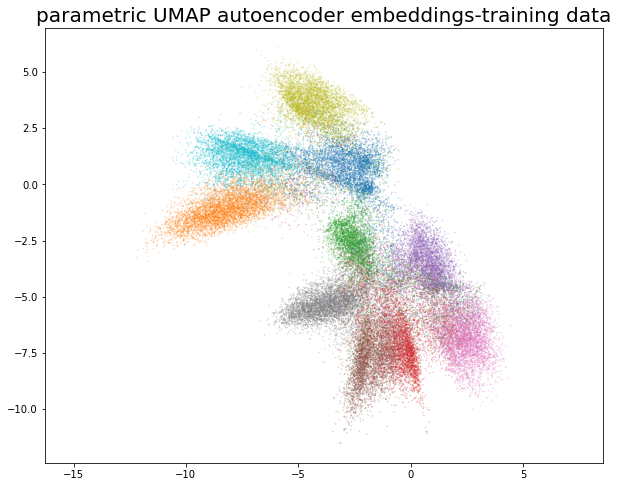

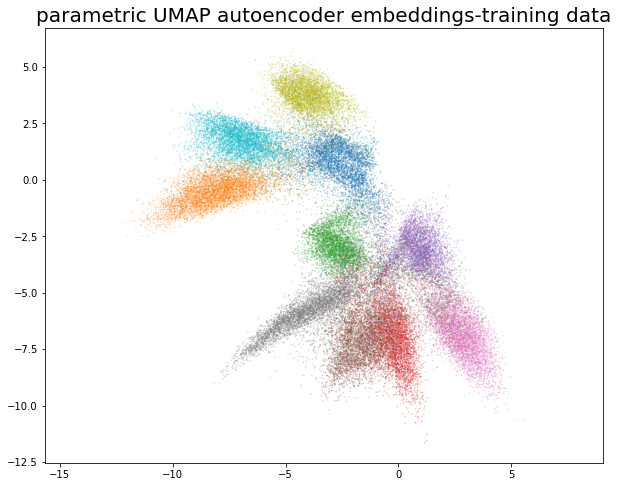

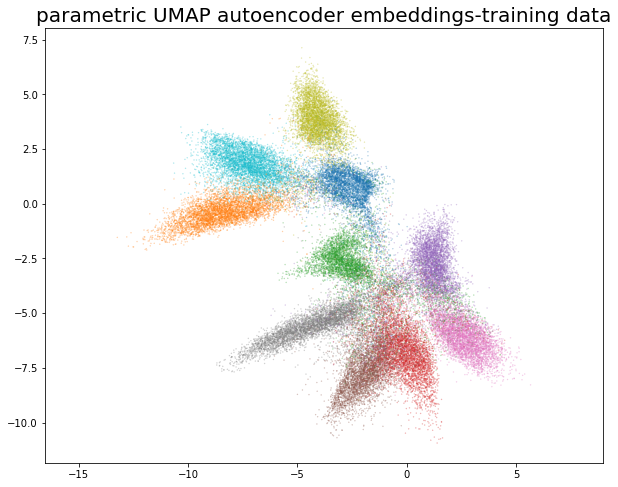

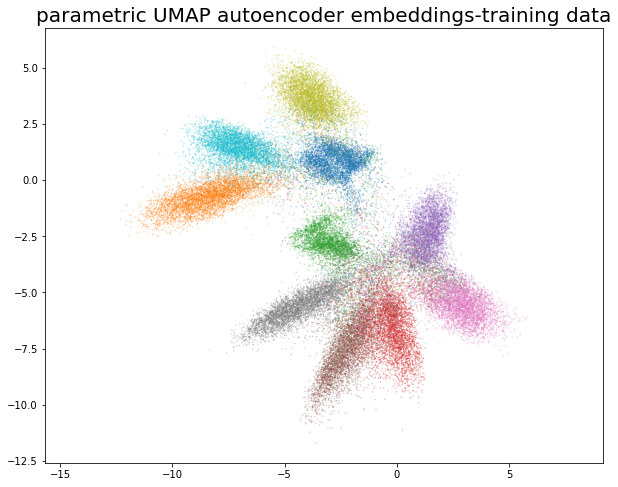

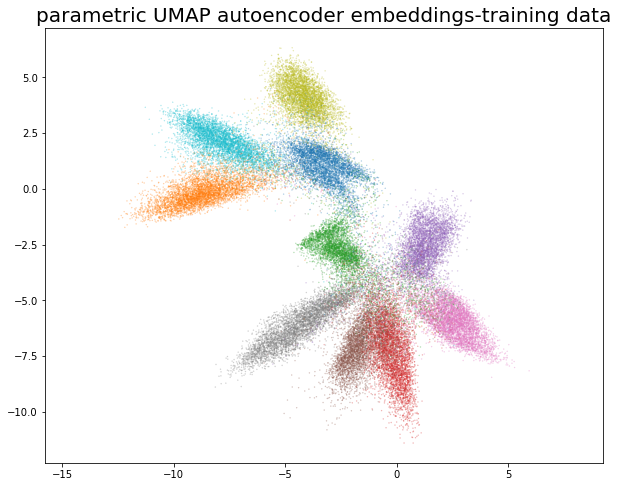

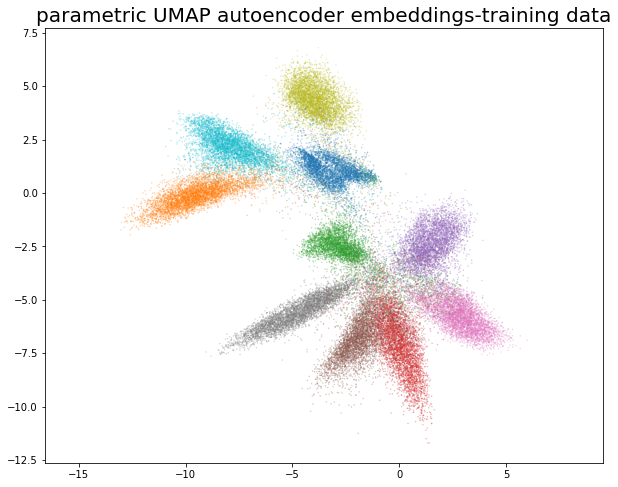

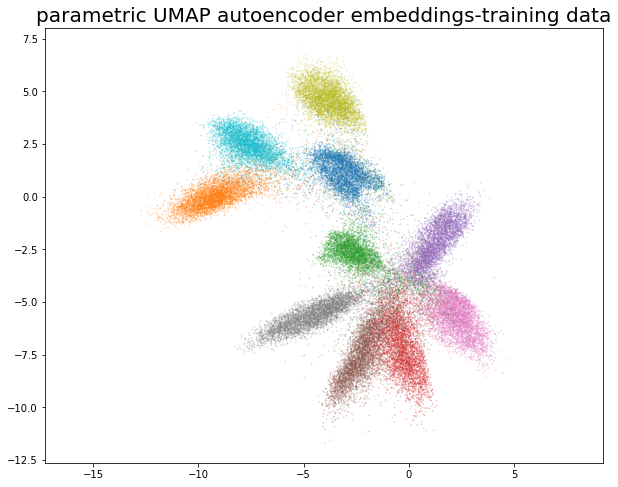

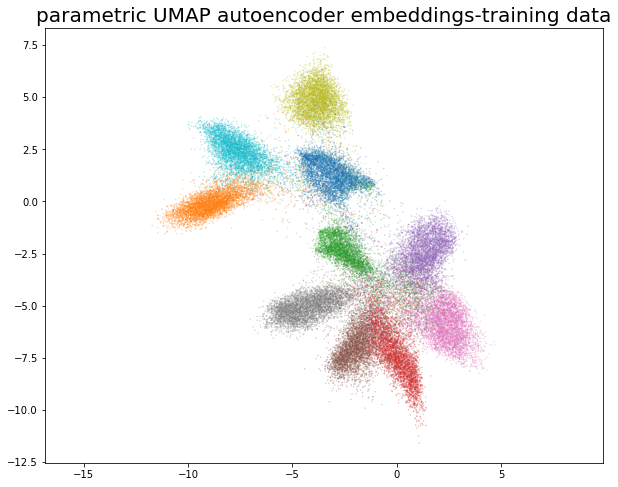

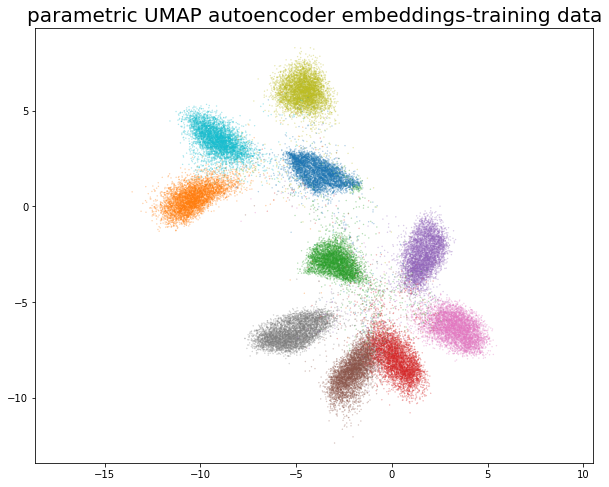

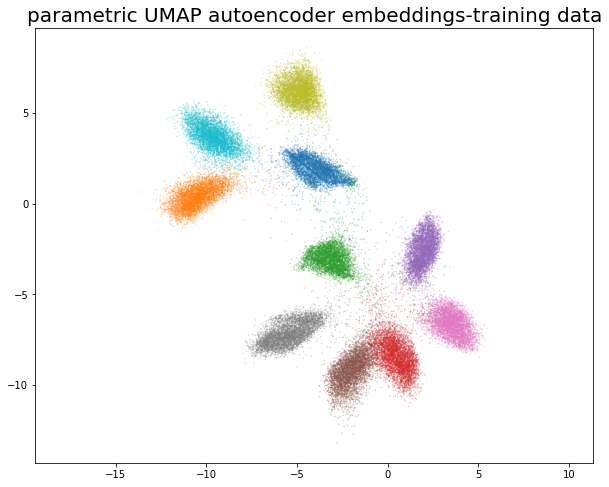

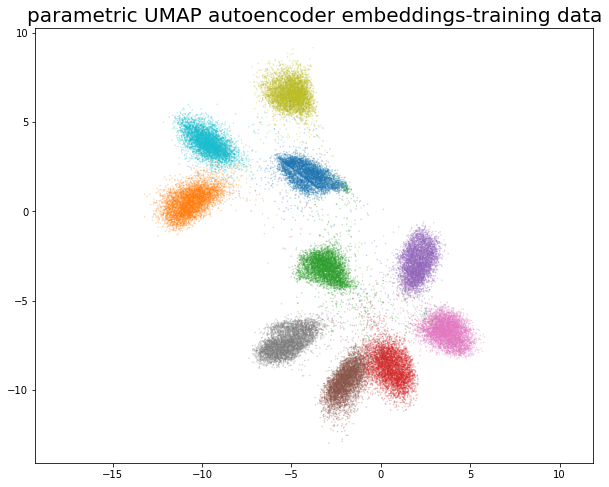

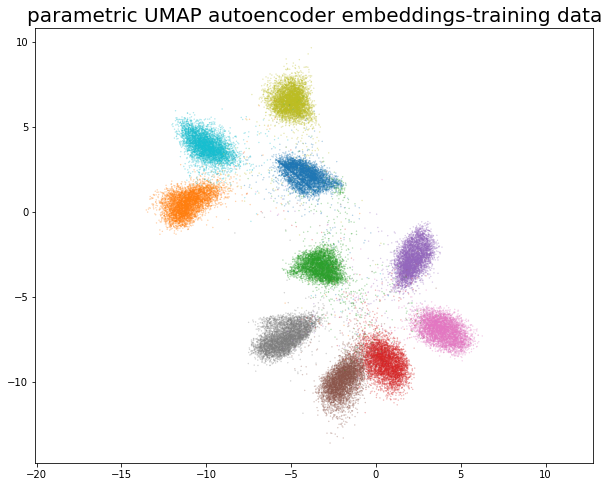

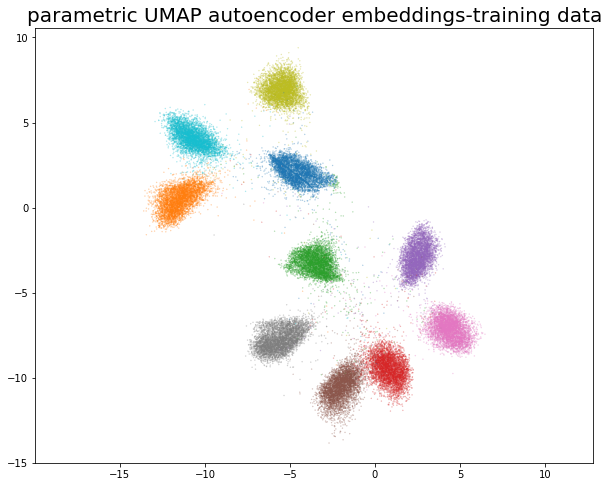

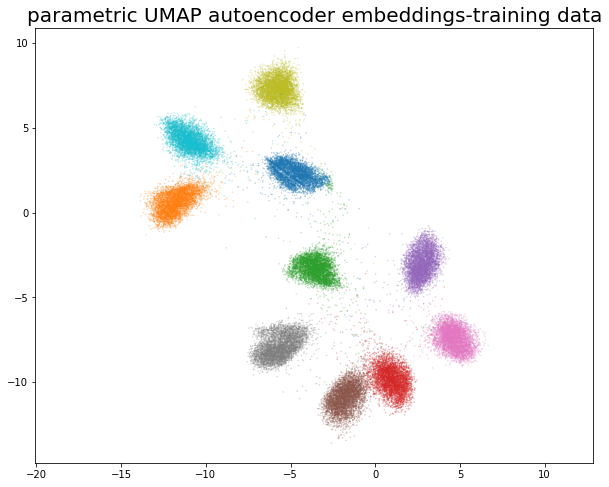

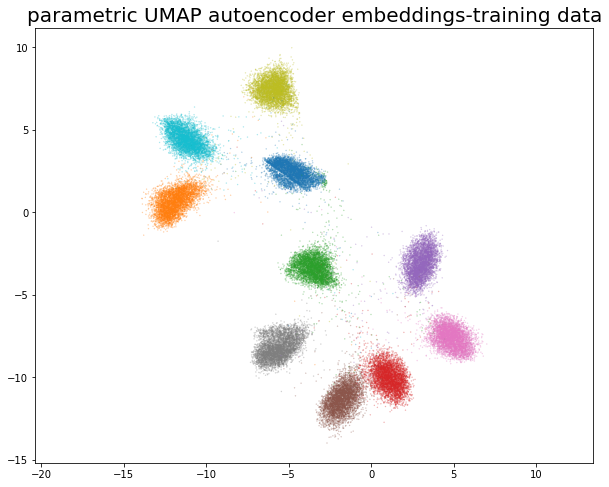

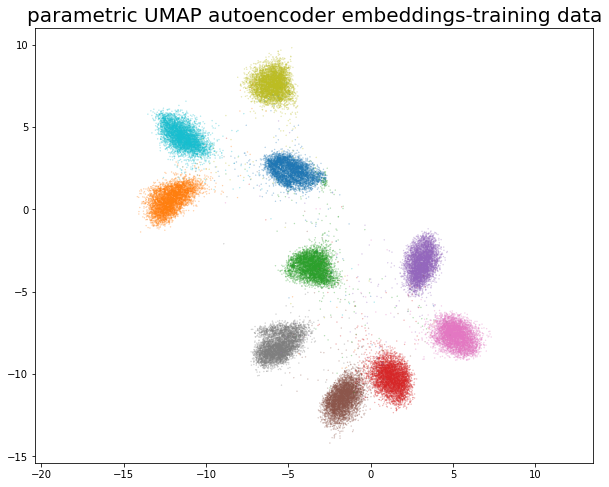

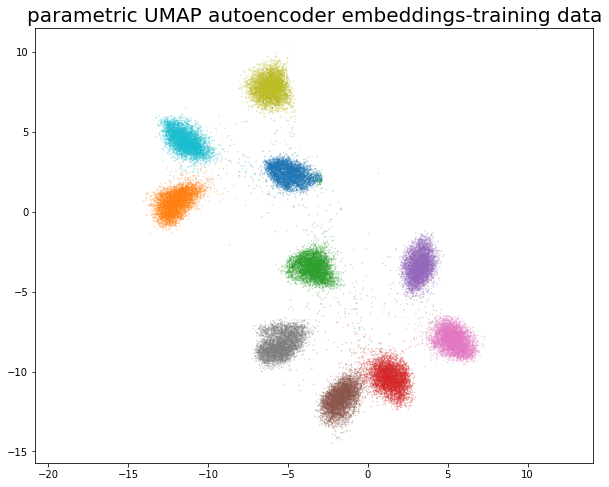

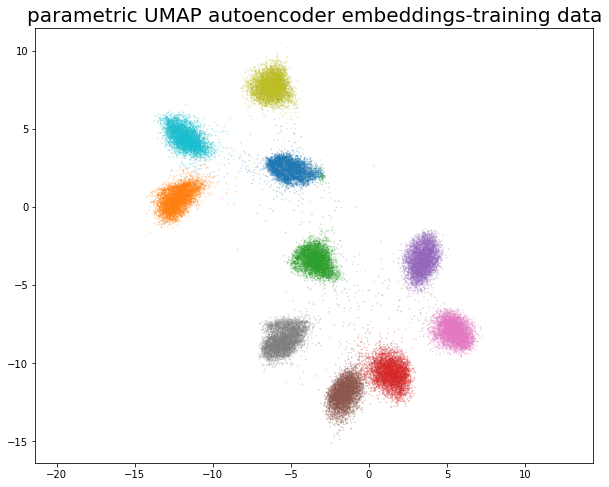

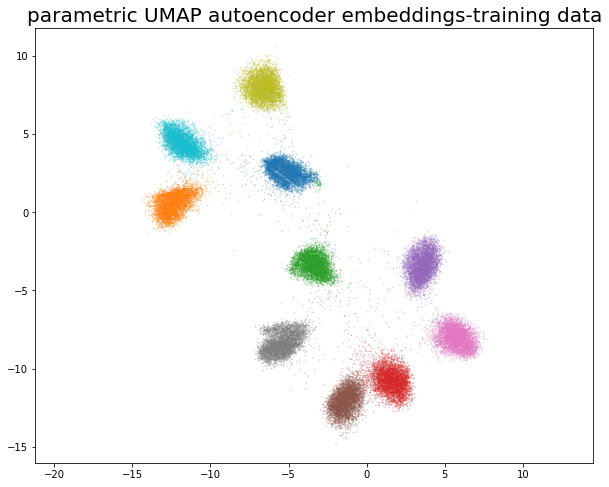

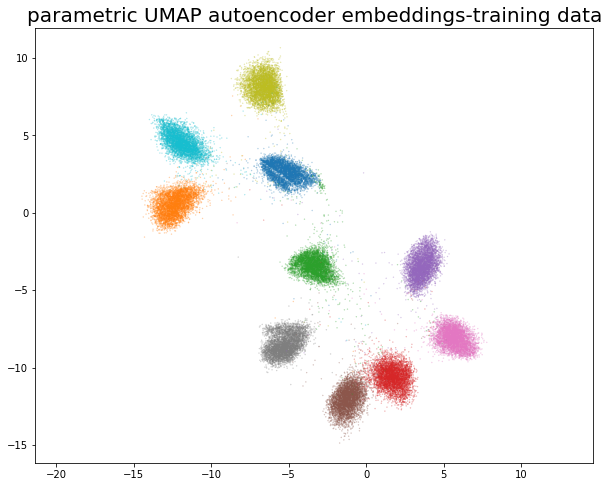

In [17]:
import matplotlib.pyplot as plt

data_dir = os.path.join(os.getcwd(),'high_output')
save_location = "parametric_umap_models\\ResNet56v1\\"
if not os.path.isdir(save_location):
    os.makedirs(save_location)
    
n_epoches = np.arange(10,210,10)
for n_epoch in n_epoches:
    datapath = os.path.join(data_dir,"train_{:03d}.npy".format(n_epoch))
    train_data = np.load(datapath)
    embedding = embedder.fit_transform(train_data)
    z = embedder.transform(train_data)
    
    # save encoder
    encoder_output = os.path.join(save_location, "encoder_{:03d}".format(n_epoch))
    embedder.encoder.save(encoder_output)
    print("Keras encoder model saved to {}".format(encoder_output))
    
    # save decoder
    decoder_output = os.path.join(save_location, "decoder_{:03d}".format(n_epoch))
    embedder.decoder.save(decoder_output)
    print("Keras decoder model saved to {}".format(decoder_output))

    fig, ax = plt.subplots(ncols=1, figsize=(10, 8))
    sc = ax.scatter(
        z[:, 0],
        z[:, 1],
        c=np.argmax(y_train, axis=1),
        cmap="tab10",
        s=0.1,
        alpha=0.5,
        rasterized=True,
    )
    ax.axis('equal')
    ax.set_title("parametric UMAP autoencoder embeddings-training data", fontsize=20)
    fig.savefig("result/evaluation/parametricUmap/train_{:03d}".format(n_epoch))

50/50 [==============================] - 0s 1ms/step


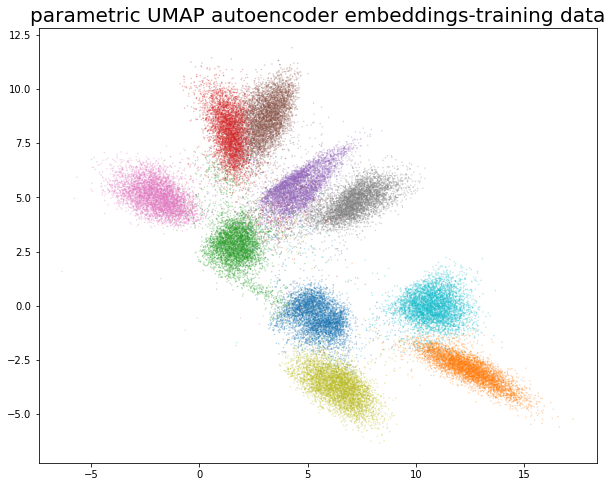

In [13]:
# example
import matplotlib.pyplot as plt
# Project data
z = embedder.transform(train_data)
# z = load_encoder(train_data)

fig, ax = plt.subplots(ncols=1, figsize=(10, 8))
sc = ax.scatter(
    z[:, 0],
    z[:, 1],
    c=np.argmax(y_train, axis=1),
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("parametric UMAP autoencoder embeddings-training data", fontsize=20)
fig.savefig("result/evaluation/parametricUmap/train_{:03d}".format(n_epoch))

In [18]:
from deepview import DeepView
# remember to reset embedder
save_location = "parametric_umap_models\\ResNet56v1\\"
if not os.path.isdir(save_location):
    os.makedirs(save_location)
    
data_dir = os.path.join(os.getcwd(),'high_output')
n_epoches = np.arange(10,210,10)

for n_epoch in n_epoches:
    datapath = os.path.join(data_dir,"train_{:03d}.npy".format(n_epoch))
    train_data = np.load(datapath)
    
    embedding = embedder.fit_transform(train_data)
    
    # save encoder
    encoder_output = os.path.join(save_location, "encoder_{:03d}".format(n_epoch))
    embedder.encoder.save(encoder_output)
    print("Keras encoder model saved to {}".format(encoder_output))
    
    # save decoder
    decoder_output = os.path.join(save_location, "decoder_{:03d}".format(n_epoch))
    embedder.decoder.save(decoder_output)
    print("Keras decoder model saved to {}".format(decoder_output))


    # ---------------------load dataset------------------------------

    def pred_wrapper(x):
        model_name = 'cifar10_ResNet56v1_model.{:03d}.h5'.format(n_epoch)
        modelpath = os.path.join(os.path.join(os.getcwd(), 'resnet_models'), model_name)
        load_model = tf.keras.models.load_model(modelpath)
        
        #load fully connect layer
        fc_input = tf.keras.layers.Input(shape=(64,))
        logits = fc_input
        logits = load_model.get_layer("dense")(logits)
        fc_model = Model(inputs=fc_input,outputs=logits)
        

        output = fc_model(x)
        probabilities = tf.nn.softmax(output,axis=-1).cpu().numpy()
        return probabilities

    def visualization(image, point2d, pred, label=None, title=None):
        f, a = plt.subplots()
        a.set_title(title)
        a.imshow(image.transpose([1, 2, 0]))

    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    # ---------------------deepview------------------------------
    batch_size = 200
    max_samples = 50000
    data_shape = (2048,)
    n = 5
    lam = 0
    resolution = 100
    cmap = 'tab10'
    title = 'ResNet-56 - CIFAR10 GAP layer-parametric umap autoencoder'

    deepview = DeepView(pred_wrapper, classes, max_samples, batch_size,
                        data_shape, n, lam, resolution, cmap, title=title, data_viz=visualization,
                        clip_certainty=1.2, metric="parametricUmap", encoder=embedder.encoder, decoder=embedder.decoder)


    deepview.add_samples(train_data, np.argmax(y_train, axis=1))
    deepview.savefig("result\\evaluation\\parametricUmap\\deepview_train_{:03d}.png".format(n_epoch))

ParametricUMAP(autoencoder_loss=True, batch_size=1000,
               decoder=<tensorflow.python.keras.engine.sequential.Sequential object at 0x00000247DFF52518>,
               dims=(64,),
               encoder=<tensorflow.python.keras.engine.sequential.Sequential object at 0x00000247DFF81CF8>,
               keras_fit_kwargs={'callbacks': [<tensorflow.python.keras.callbacks.EarlyStopping object at 0x00000247E0FAE390>,
                                               <tensorflow.python.keras.callbacks.TensorBoard object at 0x00000247E0FAEDA0>]},
               n_training_epochs=100,
               optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x00000247DFFBBB38>,
               parametric_reconstruction=True)
Construct fuzzy simplicial set
Thu Dec 17 01:00:55 2020 Finding Nearest Neighbors
Thu Dec 17 01:00:55 2020 Building RP forest with 16 trees
Thu Dec 17 01:00:56 2020 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold m

D:\xianglin\git_space\DeepVisualInsight\DeepView\parametric_umap.py:268: UserWarning: Data should be scaled to the range 0-1 for cross-entropy reconstruction loss.
  "Data should be scaled to the range 0-1 for cross-entropy reconstruction loss."


Epoch 1/1000
612/612 [==============================] - 6s 9ms/step - loss: 0.7064 - reconstruction_loss: 0.5027 - umap_loss: 0.2037
Epoch 2/1000
612/612 [==============================] - 5s 7ms/step - loss: 0.5293 - reconstruction_loss: 0.3440 - umap_loss: 0.1854
Epoch 3/1000
612/612 [==============================] - 5s 7ms/step - loss: 0.5142 - reconstruction_loss: 0.3318 - umap_loss: 0.1824
Epoch 4/1000
612/612 [==============================] - 5s 8ms/step - loss: 0.5065 - reconstruction_loss: 0.3260 - umap_loss: 0.1805
Epoch 5/1000
612/612 [==============================] - 5s 8ms/step - loss: 0.5016 - reconstruction_loss: 0.3220 - umap_loss: 0.1795A: 2s - loss: 0.5017 
Epoch 6/1000
612/612 [==============================] - 5s 8ms/step - loss: 0.4982 - reconstruction_loss: 0.3196 - umap_loss: 0.1786
Epoch 7/1000
612/612 [==============================] - 5s 8ms/step - loss: 0.4967 - reconstruction_loss: 0.3181 - umap_loss: 0.1786
Epoch 8/1000
612/612 [==========================

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 64 and the array at index 1 has size 2048

## compare the distance between high dimension data and low dimension data
k = high_dist / low_dist

In [ ]:
import pandas as pd
diff = pd.DataFrame(columns = ["epoches","max_dist","min_dist","mean_dist","median_dist","std_dist"])

In [ ]:
n_epoches = np.arange(2,36,2)
encoder_location = "parametric_umap_models\\ResNet56v1\\"

for n_epoch in n_epoches:
    datapath = os.path.join(data_dir,"train_{:03d}.npy".format(n_epoch))
    train_prev = np.load(datapath)
    datapath = os.path.join(data_dir,"train_{:03d}.npy".format(n_epoch+2))
    train_behind = np.load(datapath)
    
    # load encoder
    encoder_path = os.path.join(encoder_location, "encoder_{:03d}".format(n_epoch))
    encoder_prev = tf.keras.models.load_model(encoder_path)
    print("Keras encoder model loaded from {}".format(encoder_path))
    encoder_path = os.path.join(encoder_location, "encoder_{:03d}".format(n_epoch+2))
    encoder_behind = tf.keras.models.load_model(encoder_path)
    print("Keras encoder model loaded from {}".format(encoder_path))
    
    low_prev = encoder_prev(train_prev).cpu().numpy()
    low_behind = encoder_behind(train_behind).cpu().numpy()
    
    high_dist = np.linalg.norm(train_prev - train_behind,axis=1)
    low_dist = np.linalg.norm(low_prev - low_behind,axis=1)
    k = high_dist / low_dist
    
    max_k = k.max()
    min_k = k.min()
    mean_k = k.mean()
    median_k = np.median(k)
    std_k = k.std()
    epoch_num = "{:03d}/{:03d}".format(n_epoch,n_epoch+2)
    diff.loc[len(diff)] = [epoch_num, max_k, min_k,  mean_k, median_k,std_k]
diff

## print the result for each snapshot and draw a demo for it

Keras encoder model loaded from parametric_umap_models\ResNet56v1\encoder_010
Keras decoder model loaded from parametric_umap_models\ResNet56v1\decoder_010
Embedding samples ...
Computing decision regions ...


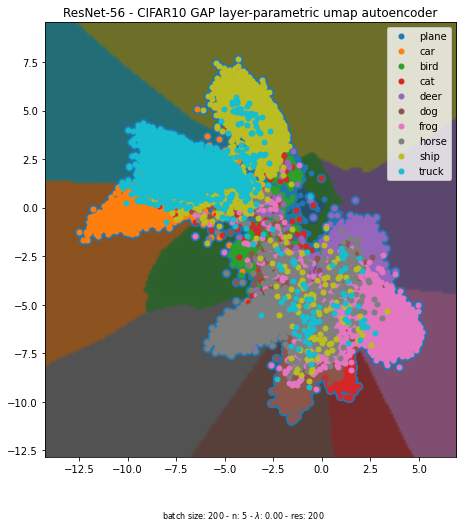

In [25]:
# using deepview
from deepview import DeepView
# remember to reset embedder
encoder_location = "parametric_umap_models\\ResNet56v1\\"
    
data_dir = os.path.join(os.getcwd(),'high_output')
n_epoches = np.arange(10,20,10)

for n_epoch in n_epoches:
    datapath = os.path.join(data_dir,"train_{:03d}.npy".format(n_epoch))
    train_data = np.load(datapath)
    
    # load encoder
    encoder_path = os.path.join(encoder_location, "encoder_{:03d}".format(n_epoch))
    encoder = tf.keras.models.load_model(encoder_path)
    print("Keras encoder model loaded from {}".format(encoder_path))
    # load decoder
    decoder_path = os.path.join(encoder_location, "decoder_{:03d}".format(n_epoch))
    decoder = tf.keras.models.load_model(decoder_path)
    print("Keras decoder model loaded from {}".format(decoder_path))


    # ---------------------load dataset------------------------------

    def pred_wrapper(x):
        model_name = 'cifar10_ResNet56v1_model.{:03d}.h5'.format(n_epoch)
        modelpath = os.path.join(os.path.join(os.getcwd(), 'resnet_models'), model_name)
        load_model = tf.keras.models.load_model(modelpath)
        
        #load fully connect layer
        fc_input = tf.keras.layers.Input(shape=(64,))
        logits = fc_input
        logits = load_model.get_layer("dense")(logits)
        fc_model = Model(inputs=fc_input,outputs=logits)
        
        output = fc_model(x)
        probabilities = tf.nn.softmax(output,axis=-1).cpu().numpy()
        return probabilities

    def visualization(image, point2d, pred, label=None, title=None):
        f, a = plt.subplots()
        a.set_title(title)
        a.imshow(image.transpose([1, 2, 0]))

    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    # ---------------------deepview------------------------------
    batch_size = 200
    max_samples = 50000
    data_shape = (64,)
    n = 5
    lam = 0
    resolution = 200
    cmap = 'tab10'
    title = 'ResNet-56 - CIFAR10 GAP layer-parametric umap autoencoder'

    deepview = DeepView(pred_wrapper, classes, max_samples, batch_size,
                        data_shape, n, lam, resolution, cmap, title=title, data_viz=visualization,
                        clip_certainty=0.1, metric="parametricUmap", encoder=encoder, decoder=decoder)


    deepview.add_samples(train_data, np.argmax(y_train, axis=1))
    deepview.savefig("result\\evaluation\\parametricUmap\\deepview_train_{:03d}.png".format(n_epoch))

In [ ]:
data_dir = os.path.join(os.getcwd(),'high_output')
encoder_location = "parametric_umap_models\\ResNet56v1\\"

n_epoches = np.arange(10,210,10)
for n_epoch in n_epoches:
    datapath = os.path.join(data_dir,"train_{:03d}.npy".format(n_epoch))
    train_data = np.load(datapath)
    
    # load encoder
    encoder_path = os.path.join(encoder_location, "encoder_{:03d}".format(n_epoch))
    encoder = tf.keras.models.load_model(encoder_path)
    print("Keras encoder model loaded from {}".format(encoder_path))
    
    z=encoder(train_data)
#     ??? .cpu.numpy()
    print(type(z))

    fig, ax = plt.subplots(ncols=1, figsize=(10, 8))
    sc = ax.scatter(
        z[:, 0],
        z[:, 1],
        c=np.argmax(y_train, axis=1),
        cmap="tab10",
        s=0.1,
        alpha=0.5,
        rasterized=True,
    )
    ax.axis('equal')
    ax.set_title("parametric UMAP autoencoder embeddings-training data", fontsize=20)
    fig.savefig("result/evaluation/parametricUmap/train_{:03d}".format(n_epoch))